Soit $Z = \{ \mathbf x_i , y_i\}, \; i\in[\![1,n]\!] ,\;\mathbf x_i \in {R}^d, y_i \in \{-1,1\}\}$ un ensemble d'apprentissage pour un problème de classification binaire.



# SVM linéaire
## Hyperplan séparateur
Une approche traditionnelle pour introduire les SVM est de partir du concept d'hyperplan séparateur des exemples positifs et négatifs de l'ensemble d'apprentissage. On définit alors la marge comme la distance du plus proche exemple à cet hyperplan, et on espère intuitivement que plus grande sera cette marge, meilleure sera la capacité de généralisation de ce séparateur linéaire.

Un hyperplan de $\mathbb{R}^d$ est défini par 

$$\mathbf w^T\mathbf x + b = 0$$


$\mathbf w$ étant le vecteur normal à l'hyperplan. La fonction 

$$\label{eq:f} 
f({\mathbf x}) = \textrm{sign}( {\mathbf w^T\mathbf x} + b )
$$

permet, si elle sépare les données d'apprentissage, de les classifier correctement ({numref}`hyp-ref`).  

```{figure} ./images/hyperplan.png
:name: hyp-ref
Hyperplan séparateur et définition de $\mathbb w$
```

Un tel hyperplan, représenté par ($\mathbf w,b)$ peut également être exprimé par $(\lambda \mathbf w,\lambda b), \lambda\in\mathbb{R}$. Il est donc nécessaire de définir l'hyperplan canonique comme étant celui éloigné des données d'une distance au moins égale à 1. En fait, on impose qu'un exemple au moins de chaque classe soit à distance égale à 1. On considère alors le couple $(\mathbf w,b)$ tel que :

$$\mathbf w^T\mathbf x_i + b \ge +1 \ \ \textrm{si} \ \ y_i = +1 \\
\mathbf w^T\mathbf x_i + b \le -1 \ \ \textrm{si} \ \ y_i = -1
$$

ou de manière plus compacte

$$\forall i\quad y_i (\mathbf  w^T\mathbf x_i + b) \ge 1$$

les hyperplans $\mathbf w^T\mathbf x_i + b =\pm 1$ sont appelés les hyperplans supports.



Une infinité d'hyperplans sépare deux nuages de points linéairement séparables ({numref}`infhyp-ref`)

```{figure} ./images/hyperplanmarge.png
:name: infhyp-ref
Hyperplans séparateurs
```


On cherche à avoir la marge la plus grande possible, et on suppose qu'au moins un point de donnée appartient aux hyperplans support. Il existe donc $\mathbf x_1,\mathbf x_2$ tels que $\mathbf w^T\mathbf x_1 + b =1$ et $\mathbf w^T\mathbf x_2 + b =-1$. On en déduit 

$$\mathbf w^T(\mathbf x_1-\mathbf x_2) =2$$

$\mathbf w$ étant orthogonal aux hyperplans, la marge est la projection orthogonale de $\mathbf x_1-\mathbf x_2$ sur $\mathbf w$. Cette projection est définie par la matrice $P=\frac{\mathbf w\mathbf w^T}{\mathbf w^T\mathbf w}$ et donc le vecteur projection de $\mathbf x_1-\mathbf x_2$ sur la droite engendrée par $\mathbf w$ est 

$$\frac{\mathbf w^T(x_1-\mathbf x_2)}{\mathbf w^T\mathbf w}\mathbf w = \frac{2}{\|\mathbf w\|}$$






L'équation précédente permet d'affirmer que maximiser la marge revient à minimiser $\|\mathbf w\|$, sous les contraintes de bonne classification ({numref}`hyp2-ref`).


```{figure} ./images/hyperplanmarge2.png
:name: hyp2-ref
Maximisation de la marge
```

## Problème d'optimisation
Le problème s'écrit alors comme un problème de minimisation sous contraintes : 

$$\min_{\mathbf w\in\mathbb{R}^d} \|\mathbf w \|^2\\
\textrm{sous }y_i(\mathbf  w^T\mathbf  x_i) \geq 1,\quad i\in[\![1,n]\!]\\
$$

En introduisant les multiplicateurs de Lagrange, le problème dual s'écrit :

$$
min  \ W(\boldsymbol\alpha) = -\displaystyle\sum_{i=1}^n{\alpha_i} +
\frac{1}{2} \displaystyle\sum_{i=1}^{n}\displaystyle \sum_{j=1}^ny_iy_j\alpha_i\alpha_j(\mathbf x_i ^T \mathbf x_j)  $$
sous 

$$\displaystyle \sum_{i=1}^n y_i\alpha_i = 0 $$

$$\forall i\in[\![1,n]\!]\; 0 \le \alpha_i \le C$$

où $\boldsymbol {\alpha}$ est le vecteur des $n$ multiplicateurs de Lagrange à déterminer, et $C$ est une constante. En définissant la matrice $(H)_{ij} = y_iy_j(\mathbf x_i ^T \mathbf x_j)$ et $\mathbf{1}$ le vecteur de $\mathbb{R}^n$ dont toutes les composantes sont égales à 1, le problème se réécrit comme un problème de programmation quadratique (QP) : 

$$
min \label{eq:qp1}  W(\boldsymbol\alpha) = {-\boldsymbol\alpha}^T \mathbf{1} + \frac{1}{2}\boldsymbol\alpha^T H \boldsymbol\alpha
\ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ & \\
\textrm{sous } \label{eq:qp2}  \boldsymbol\alpha^T\boldsymbol y = 0
\ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ & \\
\label{eq:qp3}  {0} \le {\boldsymbol\alpha} \le C\mathbf{1}
\ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ &
$$

pour lequel de nombreuses méthodes de résolution ont été développées.

En dérivant l'équation précédente, il est possible de montrer que l'hyperplan optimal (canonique) peut être écrit comme 

$$\label{eq:w} \mathbf w = \displaystyle\sum_{i=1}^n \alpha_i y_i \mathbf x_i
$$
et $\mathbf w$ est donc juste une combinaison linéaire des exemples d'apprentissage.

On peut également montrer que 

$$\forall i\in[\![1,n]\!]\quad \alpha_i(y_i(\mathbf w^T \mathbf x_i + b) - 1) = 0 
$$

ce qui exprime que lorsque $y_i(\mathbf w ^T \mathbf x_i + b) > 1$, alors  $\alpha_i = 0$ : seuls les points d'apprentissage les plus proches de l'hyperplan (tels que $\alpha_i > 0$)  contribuent au calcul de ce dernier, et on les appelle les vecteurs de support.


En supposant avoir résolu le problème QP, et donc en disposant du $\boldsymbol {\alpha}$ qui permet de calculer le vecteur $\mathbf w$ optimal, il reste à déterminer le biais $b$. Pour cela, en prenant un exemple positif  $\mathbf x^+$ et un exemple négatif  $\mathbf x^-$ quelconques, pour lesquels 

$$(\mathbf w ^T \mathbf x^+ + b) = +1 \\
(\mathbf w ^T \mathbf x^- + b) = -1
$$

on a 

$$b = - \frac{1}{2} ( \mathbf w ^T \mathbf x^+ + \mathbf w ^T \mathbf x^- )
$$

L'hyperplan ainsi défini a besoin de très peu de vecteurs de support (méthode éparse) ({numref}`svmlin-ref`). 



```python
from sklearn.svm import LinearSVC
X,y=...
svm_clf=LinearSVC(random_state=0,tol=1e-05)
svm_clf.fit(X, y);
```



```{figure} ./images/svmLin.png
:name: svmlin-ref
Les vecteurs de support sont entourés.
```






## Données non linéairement séparables

Il reste à préciser le rôle de la contrainte ${0} \le {\boldsymbol \alpha} \le C\mathbf{1}$.
Lorsque $C\rightarrow\infty$, l'hyperplan optimal est celui qui sépare totalement les données d'apprentissage (si tant est qu'il existe). Pour des valeurs de $C$ "raisonnables", des erreurs de classification peuvent être acceptées par le classifieur (soft margin). Pour cela on introduit des variables d'écart $\xi_i$ :

$$\forall i\in[\![1,n]\!]\quad y_i(\mathbf w ^T \mathbf x_i + b) > 1-\xi_i$$

Les vecteurs de support vérifient l'égalité, et les anciennes contraintes peuvent être violées de deux manières :
- $(\mathbf x_i,y_i)$ est à distance inférieure à la marge, mais du bon côté de l'hyperplan
- $(\mathbf x_i,y_i)$ est du mauvais côté de l'hyperplan

L'objectif est alors de minimiser  la moyenne des erreurs de classification $\displaystyle\sum_{i=1}^n \mathbf{1}_{\xi_i>0}$. Ce problème étant NP-complet (fonction non continue et dérivable), on lui préfère le problème suivant 

$$	Min \frac{1}{2}\mathbf w^T\mathbf w + C\displaystyle\sum_{i}^n \xi_i\\
	sous\;  y_i\left ( \mathbf w^T\mathbf x_i+b\right )= 1-\xi_i
$$

$C$ représente alors un compromis entre la marge possible entre les exemples et le nombre d'erreurs admissibles.
Nous illustrons dans la suite deux situations influencées par $C$ : 

- La {numref}`soft1-ref` présente une première illustration du rôle de $C$ : dans le cas de données linéairement séparables, un $C$ faible autorisera des  vecteurs à rentrer dans la marge (vert). Plus $C$ devient grand, plus le nombre de vecteurs support diminue, pour ne laisser aucun vecteur à distance inférieure à la marge de l'hyperplan optimal

```{figure} ./images/soft1.png
:name: soft1-ref
Données linéairement séparables
```

In [1]:
from IPython.display import Video
Video("videos/influencec.mp4",embed =True,width=500)

```python
from sklearn.svm import SVC
X,y=...
svm_clf=SVC(kernel="linear", C=1E10)
svm_clf.fit(X, y);
```



- La {numref}`soft2-ref` présente un ensemble de données non linéairement séparables. La valeur de $C$ contrôle le nombre d'erreurs de classification dans le résultat final.

```{figure} ./images/soft2.png
:name: soft2-ref
Données non linéairement séparables
```



## Cas multiclasses
Deux stratégies sont possibles dans le cas multiclasse : 

````{tab-set}
```{tab-item} Un contre tous
Transformer le problème à $k$ classes en $k$ classifieurs binaires, la classe de l'exemple est donnée par le classifieur qui répond le mieux
![](images/ova1.png)
```

```{tab-item} Un contre un
Transformer le problème en $\frac{k(k-1)}{2}$ classifieurs binaires, chaque classe étant comparée aux autres. La classe de l'exemple est donnée par le vote majoritaire ou par un graphe acyclique de décision
![](images/ova2.png)
```
````


# SVM non linéaire
Pour utiliser les SVM dans un contexte non linéaire, on profite de l'[astuce du noyau](kernelTrick.md) puisque le modèle s'écrit avec un produit scalaire canonique.

```{margin} Exemple de regression
![](images/ridgeregression.png)
```


# Utilisation en régression
Il est également possible, en changeant les fonctions de perte,  d'utiliser les SVM  en régression non paramétrique (SVR : Support Vector Regression)
, i.e. approcher une fonction de $\mathbb{R}^d$ dans $\mathbb{R}^p$ par les mêmes mécanismes d'optimisation. 

Pour illustrer les SVR, on génère des données aléatoires 2D à tendance linéaire et on utilise LinearSVR pour effectuer une régression linéaire.

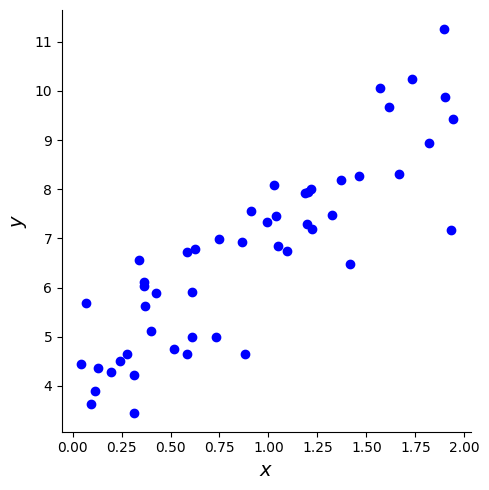

In [2]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)
m = 50
X = 2 * np.random.rand(m, 1)
y = (4 + 3 * X + np.random.randn(m, 1)).ravel()
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(r"$x$", fontsize=14)
ax.set_ylabel(r"$y$", fontsize=14)
ax.plot(X, y,"bo");
plt.tight_layout()

Un SVR linéaire est principalement défini par un paramètre $\epsilon$, qui spécifie la largeur du tube dans lequel aucune pénalité n'est associée.

In [3]:
from sklearn.svm import LinearSVR
svm_reg1 = LinearSVR(epsilon=0.5, random_state=42)
svm_reg2 = LinearSVR(epsilon=1.5, random_state=42)
svm_reg1.fit(X, y)
svm_reg2.fit(X, y)

def find_support_vectors(svm_reg, X, y):
    y_pred = svm_reg.predict(X)
    off_margin = (np.abs(y - y_pred) >= svm_reg.epsilon)
    return np.argwhere(off_margin)

svm_reg1.support_ = find_support_vectors(svm_reg1, X, y)
svm_reg2.support_ = find_support_vectors(svm_reg2, X, y)

eps_x1 = 1
eps_y_pred = svm_reg1.predict([[eps_x1]])

/usr/local/lib/python3.12/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/usr/local/lib/python3.12/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


On affiche alors les régresseurs linéaires

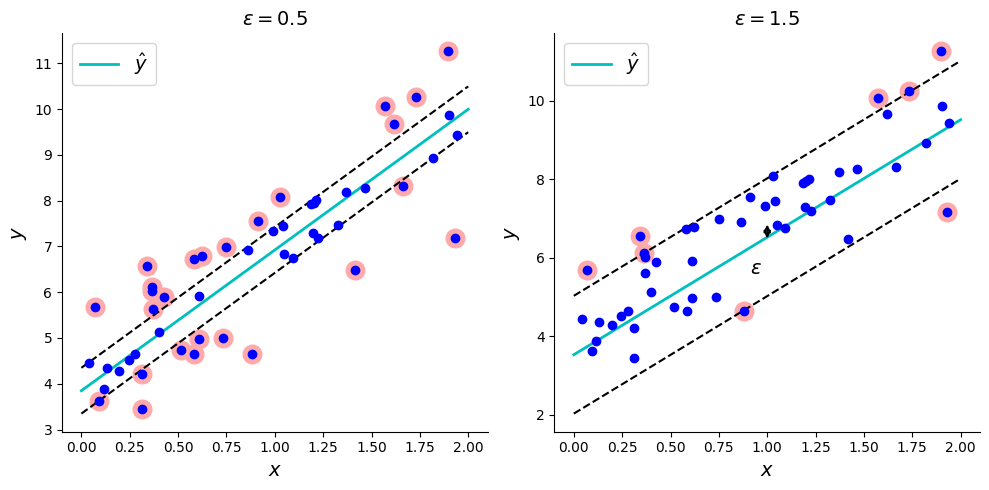

In [4]:
def plot_svm_regression(svm_reg, ax,X, y, axes):
    x1s = np.linspace(axes[0], axes[1], 100).reshape(100, 1)
    y_pred = svm_reg.predict(x1s)
    ax.plot(x1s, y_pred, "c-", linewidth=2, label=r"$\hat{y}$")
    ax.plot(x1s, y_pred + svm_reg.epsilon, "k--")
    ax.plot(x1s, y_pred - svm_reg.epsilon, "k--")
    ax.scatter(X[svm_reg.support_], y[svm_reg.support_], s=180, facecolors='#FFAAAA')
    ax.plot(X, y, "bo")
    ax.set_xlabel(r"$x$", fontsize=14)
    ax.set_ylabel(r"$y$", fontsize=14)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.legend(loc="upper left", fontsize=14)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
plot_svm_regression(svm_reg1, ax[0],X, y, [0, 2, 3, 11])
ax[0].set_title(r"$\epsilon = {}$".format(svm_reg1.epsilon), fontsize=14)
plt.annotate(
        '', xy=(eps_x1, eps_y_pred), xycoords='data',
        xytext=(eps_x1, eps_y_pred - svm_reg1.epsilon),
        textcoords='data', arrowprops={'arrowstyle': '<->', 'linewidth': 1.5}
    )
plt.text(0.91, 5.6, r"$\epsilon$", fontsize=14)
plot_svm_regression(svm_reg2,ax[1], X, y, [0, 2, 3, 11])
ax[1].set_title(r"$\epsilon = {}$".format(svm_reg2.epsilon), fontsize=14)
plt.tight_layout()

In [5]:
from IPython.display import Video
Video("videos/svr_regression_lin.mp4",embed =True,width=500)

```{bibliography}
```